In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from scipy.stats import shapiro  
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import adfuller
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv(r"C:\Users\mayin\Desktop\Proyectos\Proyecto modulo 2\Notebooks\my_listings.csv")
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm_x,license,listing_url,picture_url,host_since,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,amenities,maximum_nights,review_scores_rating,instant_bookable,description_and_neighborhood_overview,shared_bathrooms,listing_id,most_recent_review_date
0,34421962,Waipouli Beach Resort E106,34386367,Kauai Calls!,Kauai,Kapaa-Wailua,22.06228,-159.31918,Entire home/apt,417.0,1,0,41,243,0,430080010111,https://www.airbnb.com/rooms/34421962,https://a0.muscache.com/pictures/prohost-api/H...,2015-05-27,f,t,t,4,2.0,1.0,"[""Air conditioning"", ""Hot tub"", ""Coffee maker""...",1125,NaN,t,"Beautiful Luxury Inner Courtyard Garden View, ...",unknown,5269,2024-03-21


In [4]:
column_order = ["listing_id","listing_url","id","name","host_id","host_name","neighbourhood","neighbourhood_group",
                "latitude","longitude","room_type","price","accommodates","bedrooms","bathrooms","shared_bathrooms",
                "amenities","description_and_neighborhood_overview","minimum_nights","maximum_nights",
                "availability_365","instant_bookable","host_is_superhost","number_of_reviews",
                "number_of_reviews_ltm_x","review_scores_rating","most_recent_review_date",
                "calculated_host_listings_count","license","host_since","host_identity_verified",
                "host_has_profile_pic","picture_url"]
df.reset_index(drop=True, inplace=True)

df=df[column_order]
df.head(2)

,listing_id,listing_url,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,accommodates,bedrooms,bathrooms,shared_bathrooms,amenities,description_and_neighborhood_overview,minimum_nights,maximum_nights,availability_365,instant_bookable,host_is_superhost,number_of_reviews,number_of_reviews_ltm_x,review_scores_rating,most_recent_review_date,calculated_host_listings_count,license,host_since,host_identity_verified,host_has_profile_pic,picture_url
0,5269,https://www.airbnb.com/rooms/34421962,34421962,Waipouli Beach Resort E106,34386367,Kauai Calls!,Kapaa-Wailua,Kauai,22.062280,-159.319180,Entire home/apt,417.0,4,1.0,2.0,unknown,"[""Air conditioning"", ""Hot tub"", ""Coffee maker""...","Beautiful Luxury Inner Courtyard Garden View, ...",1,1125,243,t,f,0,0,NaN,2024-03-21,41,430080010111,2015-05-27,t,t,https://a0.muscache.com/pictures/prohost-api/H...
1,5269,https://www.airbnb.com/rooms/40707945,40707945,DO NOT PUBLISH BEFORE MERGING 14891-HROV,182704096,Aston Waikiki Beach Hotel,Primary Urban Center,Honolulu,21.272438,-157.822556,Private room,290.0,1,1.0,1.5,unknown,"[""Elevator"", ""Baby bath"", ""Baby monitor"", ""Air...",This is the description of this beautiful hote...,1,28,365,t,f,0,0,NaN,2024-03-21,9,unknown,2018-04-05,t,t,https://a0.muscache.com/pictures/prohost-api/H...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34049 entries, 0 to 34048
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             34049 non-null  int64  
 1   listing_url                            34049 non-null  object 
 2   id                                     34049 non-null  int64  
 3   name                                   34049 non-null  object 
 4   host_id                                34049 non-null  int64  
 5   host_name                              34047 non-null  object 
 6   neighbourhood                          34049 non-null  object 
 7   neighbourhood_group                    34049 non-null  object 
 8   latitude                               34049 non-null  float64
 9   longitude                              34049 non-null  float64
 10  room_type                              34049 non-null  object 
 11  pr

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34049 entries, 0 to 34048
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   listing_id                             34049 non-null  int64  
 1   listing_url                            34049 non-null  object 
 2   id                                     34049 non-null  int64  
 3   name                                   34049 non-null  object 
 4   host_id                                34049 non-null  int64  
 5   host_name                              34047 non-null  object 
 6   neighbourhood                          34049 non-null  object 
 7   neighbourhood_group                    34049 non-null  object 
 8   latitude                               34049 non-null  float64
 9   longitude                              34049 non-null  float64
 10  room_type                              34049 non-null  object 
 11  pr

In [7]:
nulos=(df.isnull().sum()/len(df)*100).round()
nulos[nulos>0]

review_scores_rating    23.0
dtype: float64

### Estadísticas

In [8]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
listing_id,34049.0,4.439170e+05,3.016480e+05,5269.0,83221.0,438923.0,7.221580e+05,9.184510e+05
id,34049.0,3.975108e+17,4.321887e+17,5269.0,33494271.0,53419571.0,8.150737e+17,1.117529e+18
host_id,34049.0,1.738481e+08,1.678216e+08,908.0,37520001.0,110127396.0,3.033865e+08,5.677585e+08
latitude,34049.0,2.100000e+01,1.000000e+00,19.0,21.0,21.0,2.100000e+01,2.200000e+01
longitude,34049.0,-1.570000e+02,1.000000e+00,-160.0,-158.0,-157.0,-1.560000e+02,-1.550000e+02
price,34049.0,3.980000e+02,8.600000e+02,20.0,160.0,249.0,4.010000e+02,2.000000e+04
accommodates,34049.0,5.000000e+00,2.000000e+00,1.0,4.0,4.0,6.000000e+00,1.600000e+01
bedrooms,34049.0,2.000000e+00,1.000000e+00,0.0,1.0,1.0,2.000000e+00,2.400000e+01
bathrooms,34049.0,2.000000e+00,1.000000e+00,0.0,1.0,1.0,2.000000e+00,1.700000e+01
minimum_nights,34049.0,8.000000e+00,2.700000e+01,1.0,1.0,2.0,4.000000e+00,1.000000e+03


### Test de normalidad

In [9]:
df_numeric=df.select_dtypes(["float64","int64"])

for column in df_numeric.columns:
    stat, p= shapiro(df_numeric[column])
    print("stat=%.3f, p=%.3f" % (stat, p))
    if p > 0.05:
	    print("No podemos rechazar que siga una distribución Gaussiana")
    else:
	    print("No sigue una distribución Gaussian")

stat=0.914, p=0.000
No sigue una distribución Gaussian
stat=0.755, p=0.000
No sigue una distribución Gaussian
stat=0.849, p=0.000
No sigue una distribución Gaussian
stat=0.928, p=0.000
No sigue una distribución Gaussian
stat=0.919, p=0.000
No sigue una distribución Gaussian
stat=0.228, p=0.000
No sigue una distribución Gaussian
stat=0.847, p=0.000
No sigue una distribución Gaussian
stat=0.808, p=0.000
No sigue una distribución Gaussian
stat=0.699, p=0.000
No sigue una distribución Gaussian
stat=0.255, p=0.000
No sigue una distribución Gaussian
stat=0.774, p=0.000
No sigue una distribución Gaussian
stat=0.924, p=0.000
No sigue una distribución Gaussian
stat=0.552, p=0.000
No sigue una distribución Gaussian
stat=0.626, p=0.000
No sigue una distribución Gaussian
stat=nan, p=1.000
No podemos rechazar que siga una distribución Gaussiana
stat=0.715, p=0.000
No sigue una distribución Gaussian


C:\Users\mayin\AppData\Local\Temp\ipykernel_57648\4192696534.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 34049.
  stat, p= shapiro(df_numeric[column])


In [10]:
stat, p = shapiro(df["price"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.228, p=0.000
No sigue una distribución Gaussiana


C:\Users\mayin\AppData\Local\Temp\ipykernel_57648\2878648124.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 34049.
  stat, p = shapiro(df["price"])


In [11]:
stat, p = shapiro(df["bedrooms"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que siga una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.808, p=0.000
No sigue una distribución Gaussiana


C:\Users\mayin\AppData\Local\Temp\ipykernel_57648\3713756843.py:1: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 34049.
  stat, p = shapiro(df["bedrooms"])


### Test de correlación

In [12]:
columns_to_drop=["listing_id","id","host_id","latitude","longitude"]
filtered_df_for_heatmap=df.drop(columns=columns_to_drop)

C:\Users\mayin\AppData\Local\Temp\ipykernel_57648\3283690295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df_for_heatmap.corr().round(2)


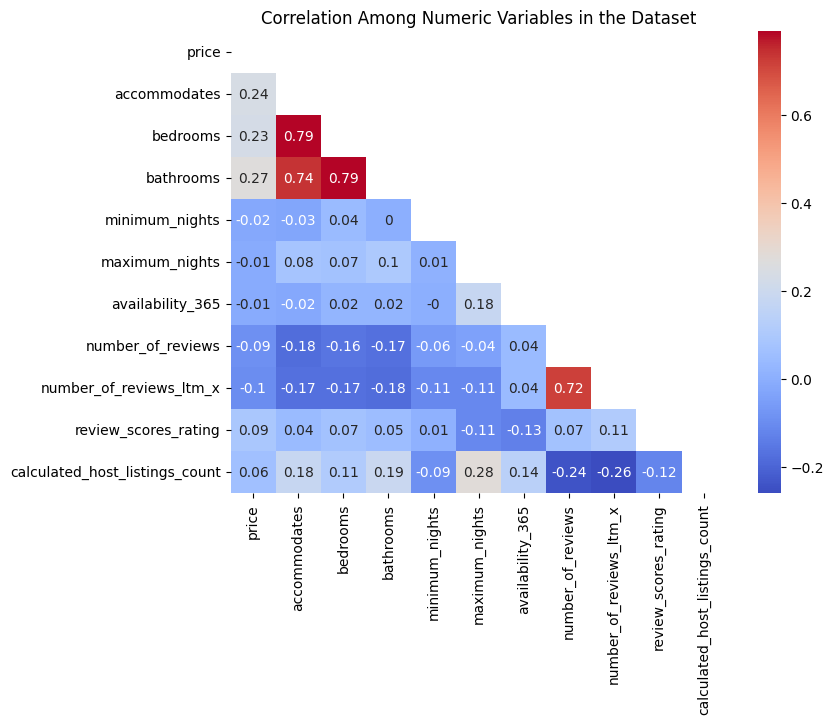

In [13]:
correlation_matrix = filtered_df_for_heatmap.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")
heatmap.set_title("Correlation Among Numeric Variables in the Dataset")
plt.show()

Notas:
- Hay una correlación positiva entre la capacidad de la habitación y el número de camas 
- Hay una correlación positiva entre la capacidad de la habitación y el número de baños
- Hay una correlación positiva entre el número de reviews general y el número de reviews en los últimos 12 meses

In [14]:
stat, p_value = pearsonr(df["price"], df["id"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.049, p=0.000
Probablemente dependientes


In [15]:
df["neighbourhood_group"]=df["neighbourhood_group"].map({'Hawaii':0, 'Honolulu':1, 'Kauai':2, 'Maui':3})

In [16]:
stat, p_value = pearsonr(df["price"], df["neighbourhood_group"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.077, p=0.000
Probablemente dependientes


In [17]:
list(set(df["neighbourhood_group"]))

[0, 1, 2, 3]

In [18]:
df.corr(method = "pearson", numeric_only=True).sort_values(by = "neighbourhood_group", axis = 0).sort_values(by = "neighbourhood_group", axis = 1)

,longitude,number_of_reviews_ltm_x,number_of_reviews,listing_id,bedrooms,id,availability_365,host_id,review_scores_rating,bathrooms,accommodates,maximum_nights,minimum_nights,price,calculated_host_listings_count,latitude,neighbourhood_group
longitude,1.000000,0.054785,0.089996,0.013628,0.017977,-0.061186,0.057116,-0.082983,0.046439,-0.013740,-0.031236,-0.037009,-0.074940,-0.017220,-0.015182,-0.928824,-0.229246
number_of_reviews_ltm_x,0.054785,1.000000,0.722759,0.007356,-0.165720,-0.168205,0.035090,-0.077611,0.107900,-0.182755,-0.171723,-0.110271,-0.109838,-0.101783,-0.259189,-0.073329,-0.116783
number_of_reviews,0.089996,0.722759,1.000000,0.009784,-0.157155,-0.365516,0.036978,-0.203641,0.067753,-0.171580,-0.184970,-0.035120,-0.064922,-0.090978,-0.242712,-0.090971,-0.080469
listing_id,0.013628,0.007356,0.009784,1.000000,0.003187,-0.005141,-0.006871,-0.001052,0.008424,0.007372,-0.007928,0.011678,-0.004145,0.005714,-0.006800,-0.021136,-0.047964
bedrooms,0.017977,-0.165720,-0.157155,0.003187,1.000000,0.011738,0.015147,-0.025702,0.067278,0.789278,0.789359,0.071691,0.044101,0.234191,0.114894,-0.040919,-0.037554
id,-0.061186,-0.168205,-0.365516,-0.005141,0.011738,1.000000,-0.050796,0.395318,-0.004671,0.009700,0.065005,-0.162241,0.024157,0.049081,0.076586,0.041291,-0.036164
availability_365,0.057116,0.035090,0.036978,-0.006871,0.015147,-0.050796,1.000000,-0.093374,-0.129720,0.018010,-0.016537,0.178220,-0.002161,-0.006422,0.138822,-0.040812,-0.029332
host_id,-0.082983,-0.077611,-0.203641,-0.001052,-0.025702,0.395318,-0.093374,1.000000,-0.020488,-0.014080,0.045022,-0.086783,0.001861,0.030968,-0.068175,0.061148,-0.026793
review_scores_rating,0.046439,0.107900,0.067753,0.008424,0.067278,-0.004671,-0.129720,-0.020488,1.000000,0.053537,0.038341,-0.108556,0.006860,0.085874,-0.116316,-0.043911,0.005917
bathrooms,-0.013740,-0.182755,-0.171580,0.007372,0.789278,0.009700,0.018010,-0.014080,0.053537,1.000000,0.738619,0.101096,0.000814,0.266693,0.187453,-0.003654,0.021250


In [19]:
list(set(df["neighbourhood"]))

['Central Oahu',
 'Hamakua',
 'Hana',
 'Waimea-Kekaha',
 'South Kohala',
 'North Hilo',
 'Wailuku-Kahului',
 'South Hilo',
 'Lahaina',
 'Kihei-Makena',
 'Molokai',
 'Puna',
 'Waianae',
 'South Kona',
 'East Honolulu',
 'Lanai',
 'Primary Urban Center',
 'Kau',
 'Kapaa-Wailua',
 'Lihue',
 'North Kohala',
 'North Shore Oahu',
 'North Kona',
 'Ewa',
 'Koolauloa',
 'Koolaupoko',
 'Makawao-Pukalani-Kula',
 'North Shore Kauai',
 'Paia-Haiku',
 'Koloa-Poipu']

In [20]:
df["neighbourhood"]=df["neighbourhood"].map({'North Shore Oahu':0,  'North Kohala':1,  'Koloa-Poipu':2,  'Ewa':3,
 'Hamakua':4,  'Molokai':5,  'South Kona':6,  'Central Oahu':7,  'South Hilo':8,  'Kau':9,  'South Kohala':10,
 'Makawao-Pukalani-Kula':11,  'Lahaina':12,  'Primary Urban Center':13,  'Lihue':14,  'Paia-Haiku':15,  'Hana':16,
 'Wailuku-Kahului':17,  'Waianae':18,  'Koolauloa':19,  'Waimea-Kekaha':19,  'North Shore Kauai':20,  'North Kona':21,
 'Kapaa-Wailua':22,  'Lanai':23,  'Koolaupoko':24,  'Kihei-Makena':25,  'East Honolulu':26,  'Puna':27})

C:\Users\mayin\AppData\Local\Temp\ipykernel_57648\4271506407.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_df_for_heatmap.corr().round(2)


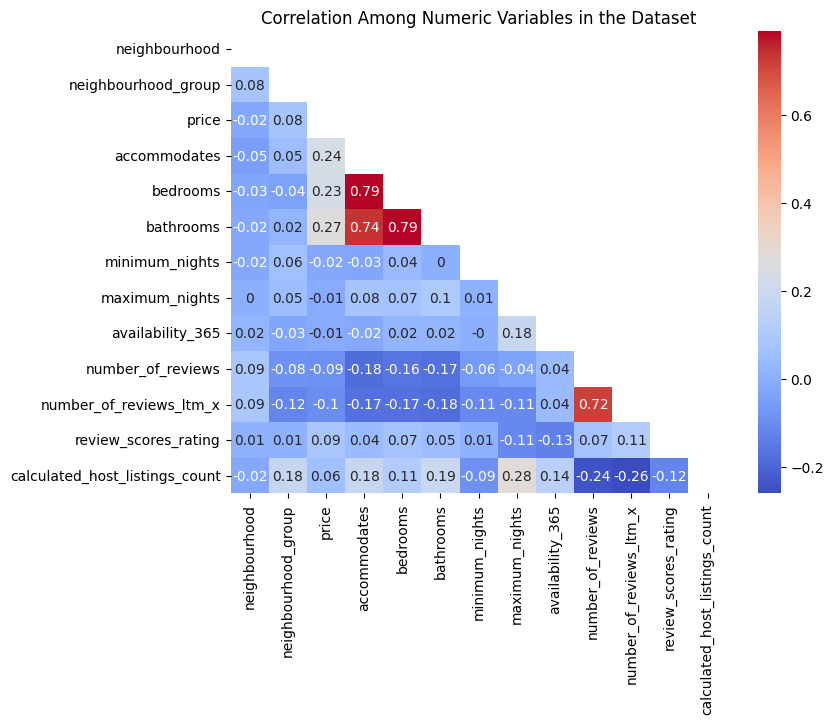

In [21]:
columns_to_drop=["listing_id","id","host_id","latitude","longitude"]
filtered_df_for_heatmap=df.drop(columns=columns_to_drop)
correlation_matrix = filtered_df_for_heatmap.corr().round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")
heatmap.set_title("Correlation Among Numeric Variables in the Dataset")
plt.show()

In [22]:
df.corr(method = "spearman", numeric_only=True).sort_values(by = "neighbourhood", axis = 0).sort_values(by = "neighbourhood", axis = 1)

,latitude,price,accommodates,minimum_nights,calculated_host_listings_count,bedrooms,host_id,id,bathrooms,review_scores_rating,listing_id,availability_365,maximum_nights,neighbourhood_group,number_of_reviews_ltm_x,number_of_reviews,longitude,neighbourhood
latitude,1.000000,0.076537,0.007622,0.075558,0.053032,-0.050235,0.075946,0.064417,-0.029969,-0.037768,-0.013053,-0.038370,0.038362,0.316723,-0.033734,-0.064712,-0.969331,-0.253215
price,0.076537,1.000000,0.524763,-0.011823,0.179852,0.485525,0.007101,0.019855,0.507295,0.207620,-0.011754,0.009228,0.059321,0.269379,-0.218828,-0.223109,-0.088374,-0.091984
accommodates,0.007622,0.524763,1.000000,0.032170,0.169899,0.797452,0.042828,0.065649,0.721664,0.101894,-0.005864,-0.033564,0.072028,0.064112,-0.171548,-0.201640,-0.014790,-0.061556
minimum_nights,0.075558,-0.011823,0.032170,1.000000,-0.301951,0.105070,-0.142097,-0.125993,0.063598,0.116052,-0.010074,-0.087873,-0.219550,0.040165,-0.068744,0.011422,-0.053867,-0.055010
calculated_host_listings_count,0.053032,0.179852,0.169899,-0.301951,1.000000,0.069397,0.024815,0.145862,0.168953,-0.129625,-0.005546,0.114595,0.318659,0.181810,-0.333351,-0.359497,-0.081939,-0.044942
bedrooms,-0.050235,0.485525,0.797452,0.105070,0.069397,1.000000,-0.018964,0.008518,0.795179,0.128869,0.003843,-0.005233,0.081144,-0.037295,-0.156758,-0.158768,0.067701,-0.042128
host_id,0.075946,0.007101,0.042828,-0.142097,0.024815,-0.018964,1.000000,0.385496,-0.017679,0.056921,0.003102,-0.071859,-0.039551,-0.014187,-0.145892,-0.278815,-0.084160,-0.035341
id,0.064417,0.019855,0.065649,-0.125993,0.145862,0.008518,0.385496,1.000000,0.003943,0.179483,-0.008698,-0.042091,-0.103881,-0.025963,-0.248364,-0.587602,-0.082061,-0.031347
bathrooms,-0.029969,0.507295,0.721664,0.063598,0.168953,0.795179,-0.017679,0.003943,1.000000,0.133365,0.009730,-0.000263,0.106468,0.032679,-0.188204,-0.189211,0.037967,-0.026536
review_scores_rating,-0.037768,0.207620,0.101894,0.116052,-0.129625,0.128869,0.056921,0.179483,0.133365,1.000000,0.007128,-0.169667,-0.151233,0.021770,-0.106333,-0.248575,0.039798,-0.024299


### Test estacionario

In [23]:
stat, p, lags, obs, crit, t = adfuller(df["price"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente no estacionaria')
else:
	print('Probablemente estacionaria')

stat=-17.264, p=0.000
Probablemente estacionaria


### Test de hipótesis paramétrico

In [24]:
stat, p = ttest_ind(df["price"], df["id"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma media')
else:
	print('Probablemente tengan distinta media')

stat=-169.718, p=0.000
Probablemente tengan distinta media


In [25]:
stat, p = ttest_ind(df["price"], df["neighbourhood_group"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma media')
else:
	print('Probablemente tengan distinta media')

stat=85.082, p=0.000
Probablemente tengan distinta media


### Test de hipótesis no paramétrico

In [26]:
stat, p = mannwhitneyu(df["price"], df["id"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=1126.000, p=0.000
Probablemente tengan distinta distribución


In [27]:
stat, p = mannwhitneyu(df["price"], df["neighbourhood_group"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente tengan la misma distribución')
else:
	print('Probablemente tengan distinta distribución')

stat=1159334401.000, p=0.000
Probablemente tengan distinta distribución
